# Scoring and Evaluation Metrics

## Overview

**Why Multiple Metrics?**
- Accuracy alone can be misleading (especially with imbalanced data)
- Different problems need different metrics
- Understanding trade-offs is crucial

## Metric Categories

### Classification Metrics
- **Accuracy**: Overall correctness
- **Precision**: Positive prediction accuracy
- **Recall**: True positive detection rate
- **F1-Score**: Harmonic mean of precision and recall
- **ROC-AUC**: Discrimination ability
- **Confusion Matrix**: Detailed error analysis

### Regression Metrics
- **MAE**: Mean Absolute Error
- **MSE**: Mean Squared Error
- **RMSE**: Root Mean Squared Error
- **R² Score**: Explained variance
- **MAPE**: Mean Absolute Percentage Error

## Setup and Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer, load_diabetes, make_classification
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import (
    # Classification metrics
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report,
    roc_curve, roc_auc_score, auc,
    precision_recall_curve, average_precision_score,
    # Regression metrics
    mean_absolute_error, mean_squared_error, r2_score,
    mean_absolute_percentage_error, max_error
)

np.random.seed(42)
sns.set_style('whitegrid')
print("✓ Libraries imported successfully")

✓ Libraries imported successfully


## Part 1: Classification Metrics

### 1.1 Confusion Matrix - The Foundation

In [2]:
# Load binary classification dataset
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target

print("Breast Cancer Dataset:")
print(f"Samples: {len(X)}")
print(f"Classes: {cancer.target_names}")
print(f"Class distribution: {np.bincount(y)} ({np.bincount(y)/len(y)*100})")

# Train model
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

model = LogisticRegression(max_iter=10000, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

print("\nConfusion Matrix:")
print("=" * 50)
print("                 Predicted")
print("               Negative  Positive")
print(f"Actual Negative    {cm[0,0]:4d}      {cm[0,1]:4d}    (TN, FP)")
print(f"       Positive    {cm[1,0]:4d}      {cm[1,1]:4d}    (FN, TP)")

# Calculate metrics from confusion matrix
TN, FP, FN, TP = cm.ravel()

print(f"\nBreakdown:")
print(f"  True Negatives (TN):  {TN} - Correctly predicted as malignant")
print(f"  False Positives (FP): {FP} - Incorrectly predicted as benign")
print(f"  False Negatives (FN): {FN} - Incorrectly predicted as malignant")
print(f"  True Positives (TP):  {TP} - Correctly predicted as benign")

Breast Cancer Dataset:
Samples: 569
Classes: ['malignant' 'benign']
Class distribution: [212 357] ([37.25834798 62.74165202])

Confusion Matrix:
                 Predicted
               Negative  Positive
Actual Negative      57         7    (TN, FP)
       Positive       2       105    (FN, TP)

Breakdown:
  True Negatives (TN):  57 - Correctly predicted as malignant
  False Positives (FP): 7 - Incorrectly predicted as benign
  False Negatives (FN): 2 - Incorrectly predicted as malignant
  True Positives (TP):  105 - Correctly predicted as benign


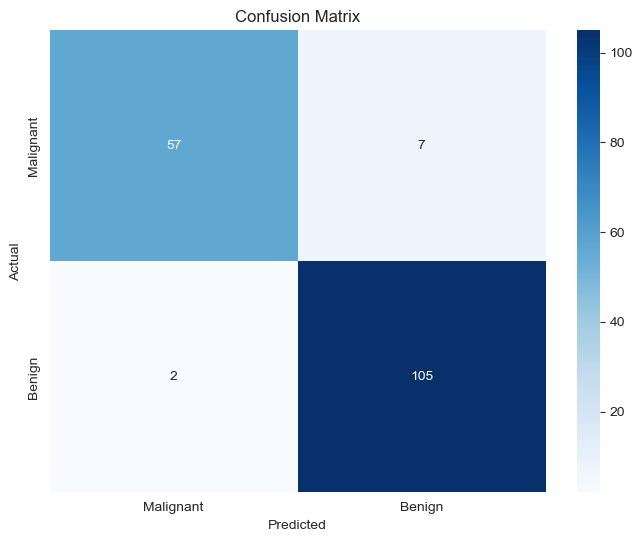

In [3]:
# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
           xticklabels=['Malignant', 'Benign'],
           yticklabels=['Malignant', 'Benign'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

### 1.2 Accuracy, Precision, Recall, F1-Score

**Formulas:**

\[
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
\]

\[
\text{Precision} = \frac{TP}{TP + FP}
\]

\[
\text{Recall (Sensitivity)} = \frac{TP}{TP + FN}
\]

\[
\text{F1-Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
\]

In [4]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Manual calculation from confusion matrix
accuracy_manual = (TP + TN) / (TP + TN + FP + FN)
precision_manual = TP / (TP + FP)
recall_manual = TP / (TP + FN)
f1_manual = 2 * (precision_manual * recall_manual) / (precision_manual + recall_manual)

print("Classification Metrics:")
print("=" * 60)
print(f"Accuracy:  {accuracy:.4f} (manual: {accuracy_manual:.4f})")
print(f"Precision: {precision:.4f} (manual: {precision_manual:.4f})")
print(f"Recall:    {recall:.4f} (manual: {recall_manual:.4f})")
print(f"F1-Score:  {f1:.4f} (manual: {f1_manual:.4f})")

print("\n" + "=" * 60)
print("Interpretation:")
print("=" * 60)
print(f"Accuracy:  {accuracy:.1%} of predictions are correct")
print(f"Precision: {precision:.1%} of predicted benign are actually benign")
print(f"Recall:    {recall:.1%} of actual benign cases were detected")
print(f"F1-Score:  {f1:.4f} (harmonic mean of precision and recall)")

Classification Metrics:
Accuracy:  0.9474 (manual: 0.9474)
Precision: 0.9375 (manual: 0.9375)
Recall:    0.9813 (manual: 0.9813)
F1-Score:  0.9589 (manual: 0.9589)

Interpretation:
Accuracy:  94.7% of predictions are correct
Precision: 93.8% of predicted benign are actually benign
Recall:    98.1% of actual benign cases were detected
F1-Score:  0.9589 (harmonic mean of precision and recall)


### When to Use Each Metric?

| Scenario | Metric | Reason |
|----------|--------|--------|
| Balanced classes, equal cost | **Accuracy** | Simple, interpretable |
| Spam detection | **Precision** | Minimize false positives (don't block important emails) |
| Cancer screening | **Recall** | Minimize false negatives (don't miss cancer cases) |
| General balance | **F1-Score** | Balances precision and recall |
| Imbalanced data | **F1, Precision, Recall** | Accuracy is misleading |
| Cost-sensitive | **Custom metric** | Weight errors differently |

### 1.3 Why Accuracy Can Be Misleading (Imbalanced Data)

In [5]:
# Create highly imbalanced dataset (99% negative, 1% positive)
X_imb, y_imb = make_classification(
    n_samples=1000,
    n_features=20,
    n_classes=2,
    weights=[0.99, 0.01],  # Highly imbalanced!
    random_state=42
)

print("Highly Imbalanced Dataset:")
print(f"Class distribution: {np.bincount(y_imb)} ({np.bincount(y_imb)/len(y_imb)*100})")

# Train model
X_tr_imb, X_te_imb, y_tr_imb, y_te_imb = train_test_split(
    X_imb, y_imb, test_size=0.3, random_state=42, stratify=y_imb
)

model_imb = LogisticRegression(max_iter=1000, random_state=42)
model_imb.fit(X_tr_imb, y_tr_imb)
y_pred_imb = model_imb.predict(X_te_imb)

# Calculate metrics
print("\nModel Performance:")
print("=" * 60)
print(f"Accuracy:  {accuracy_score(y_te_imb, y_pred_imb):.4f}")
print(f"Precision: {precision_score(y_te_imb, y_pred_imb, zero_division=0):.4f}")
print(f"Recall:    {recall_score(y_te_imb, y_pred_imb):.4f}")
print(f"F1-Score:  {f1_score(y_te_imb, y_pred_imb):.4f}")

# Dummy classifier that always predicts majority class
y_dummy = np.zeros_like(y_te_imb)  # Always predict class 0

print("\nDummy Classifier (always predicts negative):")
print("=" * 60)
print(f"Accuracy:  {accuracy_score(y_te_imb, y_dummy):.4f}  ← High! But useless!")
print(f"Precision: {precision_score(y_te_imb, y_dummy, zero_division=0):.4f}")
print(f"Recall:    {recall_score(y_te_imb, y_dummy):.4f}  ← Zero! Misses all positives!")
print(f"F1-Score:  {f1_score(y_te_imb, y_dummy):.4f}")

print("\n⚠️ High accuracy doesn't mean good model with imbalanced data!")
print("✓ Use precision, recall, and F1-score instead!")

Highly Imbalanced Dataset:
Class distribution: [987  13] ([98.7  1.3])

Model Performance:
Accuracy:  0.9867
Precision: 0.5000
Recall:    0.2500
F1-Score:  0.3333

Dummy Classifier (always predicts negative):
Accuracy:  0.9867  ← High! But useless!
Precision: 0.0000
Recall:    0.0000  ← Zero! Misses all positives!
F1-Score:  0.0000

⚠️ High accuracy doesn't mean good model with imbalanced data!
✓ Use precision, recall, and F1-score instead!


### 1.4 Classification Report - All Metrics at Once

In [6]:
# Full classification report
print("Classification Report (Original Cancer Dataset):")
print("=" * 60)
print(classification_report(y_test, y_pred, target_names=cancer.target_names))

print("\nWhat Each Column Means:")
print("  - precision: Of predictions for this class, how many were correct?")
print("  - recall: Of actual instances of this class, how many did we find?")
print("  - f1-score: Harmonic mean of precision and recall")
print("  - support: Number of actual instances in test set")
print("\nAveraging Methods:")
print("  - macro avg: Unweighted mean (treats all classes equally)")
print("  - weighted avg: Weighted by support (accounts for imbalance)")

Classification Report (Original Cancer Dataset):
              precision    recall  f1-score   support

   malignant       0.97      0.89      0.93        64
      benign       0.94      0.98      0.96       107

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171


What Each Column Means:
  - precision: Of predictions for this class, how many were correct?
  - recall: Of actual instances of this class, how many did we find?
  - f1-score: Harmonic mean of precision and recall
  - support: Number of actual instances in test set

Averaging Methods:
  - macro avg: Unweighted mean (treats all classes equally)
  - weighted avg: Weighted by support (accounts for imbalance)


### 1.5 ROC Curve and AUC Score

ROC AUC Score: 0.9889

Interpretation:
  - AUC = 0.99 means 98.9% chance that model ranks random
    positive instance higher than random negative instance

AUC Scale:
  - 1.0 = Perfect classifier
  - 0.9-1.0 = Excellent
  - 0.8-0.9 = Good
  - 0.7-0.8 = Fair
  - 0.5 = No discrimination (random guessing)
  - < 0.5 = Worse than random


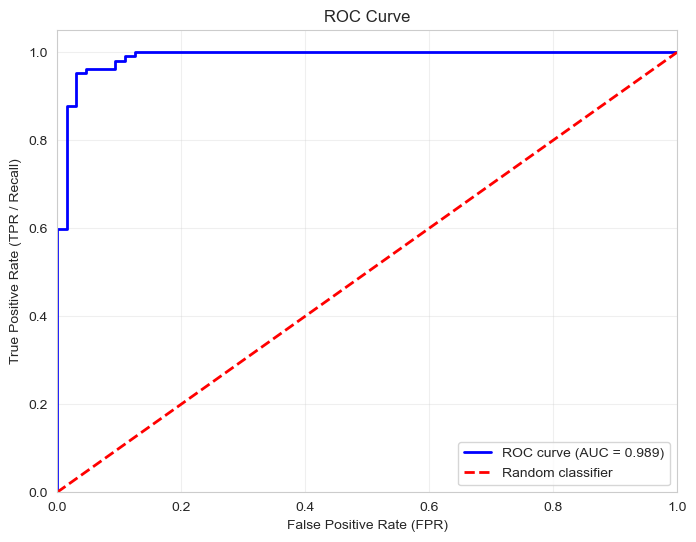

In [7]:
# Get probability predictions
y_proba = model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

print(f"ROC AUC Score: {roc_auc:.4f}")
print("\nInterpretation:")
print(f"  - AUC = {roc_auc:.2f} means {roc_auc:.1%} chance that model ranks random")
print("    positive instance higher than random negative instance")
print("\nAUC Scale:")
print("  - 1.0 = Perfect classifier")
print("  - 0.9-1.0 = Excellent")
print("  - 0.8-0.9 = Good")
print("  - 0.7-0.8 = Fair")
print("  - 0.5 = No discrimination (random guessing)")
print("  - < 0.5 = Worse than random")

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, 'b-', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], 'r--', lw=2, label='Random classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR / Recall)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

### 1.6 Precision-Recall Curve (Better for Imbalanced Data)

Average Precision Score: 0.9925

When to use PR curve vs ROC curve:
  - Balanced data: ROC AUC
  - Imbalanced data: PR curve (more informative)
  - Care about positive class: PR curve


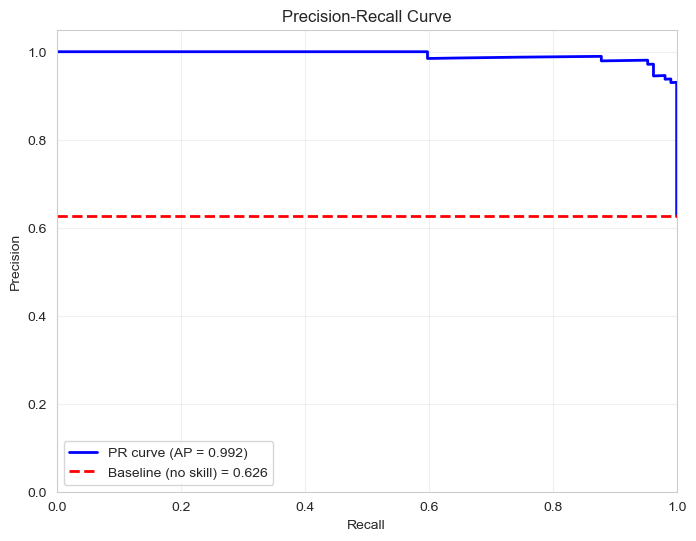

In [8]:
# Calculate PR curve
precision_curve, recall_curve, pr_thresholds = precision_recall_curve(y_test, y_proba)
avg_precision = average_precision_score(y_test, y_proba)

print(f"Average Precision Score: {avg_precision:.4f}")
print("\nWhen to use PR curve vs ROC curve:")
print("  - Balanced data: ROC AUC")
print("  - Imbalanced data: PR curve (more informative)")
print("  - Care about positive class: PR curve")

# Plot PR curve
plt.figure(figsize=(8, 6))
plt.plot(recall_curve, precision_curve, 'b-', lw=2, 
        label=f'PR curve (AP = {avg_precision:.3f})')
baseline = np.sum(y_test) / len(y_test)
plt.axhline(y=baseline, color='r', linestyle='--', lw=2, 
           label=f'Baseline (no skill) = {baseline:.3f}')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.grid(alpha=0.3)
plt.show()

### 1.7 Multiclass Classification Metrics

Multiclass Classification (Iris):

Precision Scores:
  Macro average:    0.8981
  Weighted average: 0.8981
  Micro average:    0.8889

Averaging Methods:
  - macro: Unweighted mean (all classes equal importance)
  - weighted: Weighted by class frequency
  - micro: Global average (same as accuracy for multiclass)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.78      0.93      0.85        15
   virginica       0.92      0.73      0.81        15

    accuracy                           0.89        45
   macro avg       0.90      0.89      0.89        45
weighted avg       0.90      0.89      0.89        45



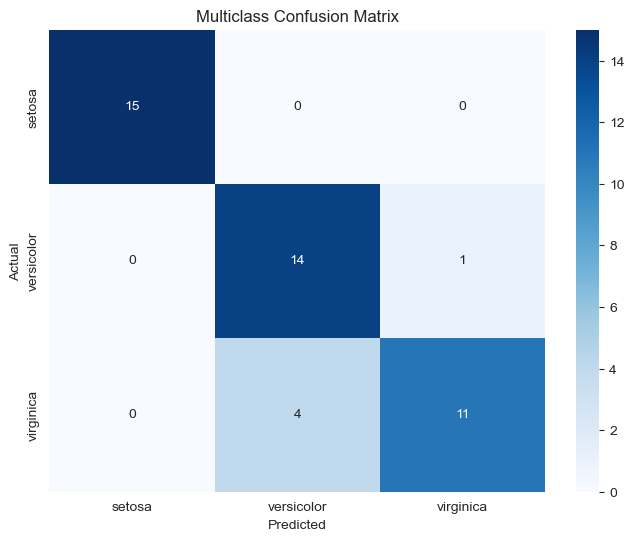

In [9]:
# Load multiclass dataset
from sklearn.datasets import load_iris
iris = load_iris()
X_iris, y_iris = iris.data, iris.target

# Train model
X_tr_iris, X_te_iris, y_tr_iris, y_te_iris = train_test_split(
    X_iris, y_iris, test_size=0.3, random_state=42, stratify=y_iris
)

model_iris = RandomForestClassifier(n_estimators=100, random_state=42)
model_iris.fit(X_tr_iris, y_tr_iris)
y_pred_iris = model_iris.predict(X_te_iris)

print("Multiclass Classification (Iris):")
print("=" * 60)

# Different averaging methods
print("\nPrecision Scores:")
print(f"  Macro average:    {precision_score(y_te_iris, y_pred_iris, average='macro'):.4f}")
print(f"  Weighted average: {precision_score(y_te_iris, y_pred_iris, average='weighted'):.4f}")
print(f"  Micro average:    {precision_score(y_te_iris, y_pred_iris, average='micro'):.4f}")

print("\nAveraging Methods:")
print("  - macro: Unweighted mean (all classes equal importance)")
print("  - weighted: Weighted by class frequency")
print("  - micro: Global average (same as accuracy for multiclass)")

# Full report
print("\n" + "=" * 60)
print(classification_report(y_te_iris, y_pred_iris, target_names=iris.target_names))

# Confusion matrix for multiclass
cm_iris = confusion_matrix(y_te_iris, y_pred_iris)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_iris, annot=True, fmt='d', cmap='Blues',
           xticklabels=iris.target_names,
           yticklabels=iris.target_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Multiclass Confusion Matrix')
plt.show()

## Part 2: Regression Metrics

### 2.1 Basic Regression Metrics

In [10]:
# Load regression dataset
diabetes = load_diabetes()
X_reg, y_reg = diabetes.data, diabetes.target

print("Diabetes Dataset (Regression):")
print(f"Samples: {len(X_reg)}")
print(f"Features: {X_reg.shape[1]}")
print(f"Target range: [{y_reg.min():.0f}, {y_reg.max():.0f}]")
print(f"Target mean: {y_reg.mean():.2f}, std: {y_reg.std():.2f}")

# Train model
X_tr_reg, X_te_reg, y_tr_reg, y_te_reg = train_test_split(
    X_reg, y_reg, test_size=0.3, random_state=42
)

model_reg = RandomForestRegressor(n_estimators=100, random_state=42)
model_reg.fit(X_tr_reg, y_tr_reg)
y_pred_reg = model_reg.predict(X_te_reg)

# Calculate all metrics
mae = mean_absolute_error(y_te_reg, y_pred_reg)
mse = mean_squared_error(y_te_reg, y_pred_reg)
rmse = np.sqrt(mse)
r2 = r2_score(y_te_reg, y_pred_reg)
mape = mean_absolute_percentage_error(y_te_reg, y_pred_reg)
max_err = max_error(y_te_reg, y_pred_reg)

print("\n" + "=" * 60)
print("REGRESSION METRICS")
print("=" * 60)
print(f"MAE (Mean Absolute Error):          {mae:.2f}")
print(f"MSE (Mean Squared Error):           {mse:.2f}")
print(f"RMSE (Root Mean Squared Error):     {rmse:.2f}")
print(f"R² Score (Coefficient of Determination): {r2:.4f}")
print(f"MAPE (Mean Absolute % Error):       {mape:.2%}")
print(f"Max Error:                          {max_err:.2f}")

Diabetes Dataset (Regression):
Samples: 442
Features: 10
Target range: [25, 346]
Target mean: 152.13, std: 77.01

REGRESSION METRICS
MAE (Mean Absolute Error):          42.75
MSE (Mean Squared Error):           2859.64
RMSE (Root Mean Squared Error):     53.48
R² Score (Coefficient of Determination): 0.4703
MAPE (Mean Absolute % Error):       38.07%
Max Error:                          157.60


### Regression Metric Formulas

**Mean Absolute Error (MAE)**:
\[
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|
\]

**Mean Squared Error (MSE)**:
\[
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
\]

**Root Mean Squared Error (RMSE)**:
\[
\text{RMSE} = \sqrt{\text{MSE}} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}
\]

**R² Score**:
\[
R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}
\]

In [11]:
print("Metric Interpretations:")
print("=" * 60)
print(f"\nMAE = {mae:.2f}")
print(f"  → On average, predictions are off by {mae:.2f} units")
print(f"  → {mae/y_reg.mean():.1%} relative to mean target value")

print(f"\nRMSE = {rmse:.2f}")
print(f"  → Root mean squared error (penalizes large errors more)")
print(f"  → Compare to target std ({y_reg.std():.2f}): {rmse/y_reg.std():.2f}x std")

print(f"\nR² = {r2:.4f}")
print(f"  → Model explains {r2:.1%} of variance in target")
print(f"  → Remaining {1-r2:.1%} is unexplained variance")
if r2 > 0.9:
    print("  → Excellent fit!")
elif r2 > 0.7:
    print("  → Good fit")
elif r2 > 0.5:
    print("  → Moderate fit")
else:
    print("  → Poor fit")

print(f"\nMAPE = {mape:.1%}")
print(f"  → On average, {mape:.1%} percentage error")
print(f"  → Lower is better (but undefined if y=0)")

Metric Interpretations:

MAE = 42.75
  → On average, predictions are off by 42.75 units
  → 28.1% relative to mean target value

RMSE = 53.48
  → Root mean squared error (penalizes large errors more)
  → Compare to target std (77.01): 0.69x std

R² = 0.4703
  → Model explains 47.0% of variance in target
  → Remaining 53.0% is unexplained variance
  → Poor fit

MAPE = 38.1%
  → On average, 38.1% percentage error
  → Lower is better (but undefined if y=0)


### 2.2 Visualizing Regression Performance

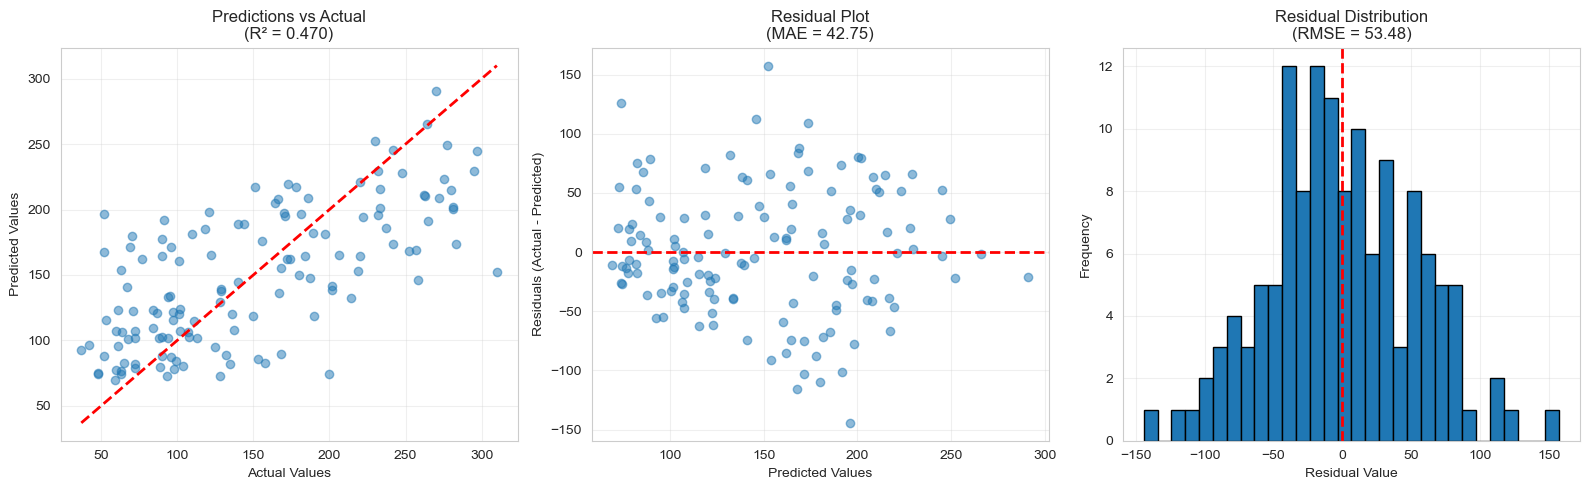

✓ Good residual plot should show:
  - Random scatter around zero (no pattern)
  - Constant variance across predictions (homoscedasticity)
  - Approximately normal distribution


In [12]:
# Create visualization
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# 1. Predicted vs Actual
axes[0].scatter(y_te_reg, y_pred_reg, alpha=0.5)
axes[0].plot([y_te_reg.min(), y_te_reg.max()], 
            [y_te_reg.min(), y_te_reg.max()], 
            'r--', lw=2)
axes[0].set_xlabel('Actual Values')
axes[0].set_ylabel('Predicted Values')
axes[0].set_title(f'Predictions vs Actual\n(R² = {r2:.3f})')
axes[0].grid(alpha=0.3)

# 2. Residuals
residuals = y_te_reg - y_pred_reg
axes[1].scatter(y_pred_reg, residuals, alpha=0.5)
axes[1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[1].set_xlabel('Predicted Values')
axes[1].set_ylabel('Residuals (Actual - Predicted)')
axes[1].set_title(f'Residual Plot\n(MAE = {mae:.2f})')
axes[1].grid(alpha=0.3)

# 3. Residual distribution
axes[2].hist(residuals, bins=30, edgecolor='black')
axes[2].axvline(x=0, color='r', linestyle='--', lw=2)
axes[2].set_xlabel('Residual Value')
axes[2].set_ylabel('Frequency')
axes[2].set_title(f'Residual Distribution\n(RMSE = {rmse:.2f})')
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("✓ Good residual plot should show:")
print("  - Random scatter around zero (no pattern)")
print("  - Constant variance across predictions (homoscedasticity)")
print("  - Approximately normal distribution")

### 2.3 Choosing the Right Regression Metric

In [13]:
# Compare metrics under different scenarios
comparison = pd.DataFrame({
    'Metric': ['MAE', 'MSE', 'RMSE', 'R²', 'MAPE'],
    'Scale': ['Same as target', 'Squared scale', 'Same as target', 'Unitless (0-1)', 'Percentage'],
    'Outlier Sensitivity': ['Low', 'High', 'High', 'Medium', 'Medium'],
    'Interpretability': ['High', 'Low', 'High', 'Very High', 'High'],
    'Best For': [
        'Equal error importance',
        'Penalize large errors',
        'Interpretable + penalize large errors',
        'Model comparison (R²>0 is better than baseline)',
        'Percentage-based errors'
    ]
})

print("\nRegression Metric Comparison:")
print("=" * 90)
print(comparison.to_string(index=False))

print("\n" + "=" * 90)
print("When to Use Each:")
print("=" * 90)
recommendations = [
    ("MAE", "All errors equally important, easy interpretation"),
    ("RMSE", "Want to penalize large errors more (default for many algorithms)"),
    ("R²", "Compare models or assess overall fit (0=baseline, 1=perfect)"),
    ("MAPE", "Errors should be relative to true values (not if y can be 0!)"),
    ("Multiple metrics", "Get complete picture of model performance")
]

for metric, usage in recommendations:
    print(f"  {metric:20s}: {usage}")


Regression Metric Comparison:
Metric          Scale Outlier Sensitivity Interpretability                                        Best For
   MAE Same as target                 Low             High                          Equal error importance
   MSE  Squared scale                High              Low                           Penalize large errors
  RMSE Same as target                High             High           Interpretable + penalize large errors
    R² Unitless (0-1)              Medium        Very High Model comparison (R²>0 is better than baseline)
  MAPE     Percentage              Medium             High                         Percentage-based errors

When to Use Each:
  MAE                 : All errors equally important, easy interpretation
  RMSE                : Want to penalize large errors more (default for many algorithms)
  R²                  : Compare models or assess overall fit (0=baseline, 1=perfect)
  MAPE                : Errors should be relative to true va

## Part 3: Using Metrics with Cross-Validation

In [14]:
# Classification with multiple metrics
print("Classification Cross-Validation with Multiple Metrics:")
print("=" * 70)

model_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Multiple scoring metrics
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

cv_results_clf = cross_validate(
    model_clf, X, y,
    cv=5,
    scoring=scoring,
    return_train_score=True
)

# Display results
for metric in scoring.keys():
    test_scores = cv_results_clf[f'test_{metric}']
    print(f"\n{metric.upper()}:")
    print(f"  Test:  {test_scores.mean():.4f} ± {test_scores.std():.4f}")
    if f'train_{metric}' in cv_results_clf:
        train_scores = cv_results_clf[f'train_{metric}']
        print(f"  Train: {train_scores.mean():.4f} ± {train_scores.std():.4f}")

Classification Cross-Validation with Multiple Metrics:

ACCURACY:
  Test:  0.9561 ± 0.0228
  Train: 1.0000 ± 0.0000

PRECISION:
  Test:  0.9590 ± 0.0251
  Train: 1.0000 ± 0.0000

RECALL:
  Test:  0.9719 ± 0.0219
  Train: 1.0000 ± 0.0000

F1:
  Test:  0.9652 ± 0.0183
  Train: 1.0000 ± 0.0000

ROC_AUC:
  Test:  0.9915 ± 0.0066
  Train: 1.0000 ± 0.0000


In [15]:
# Regression with multiple metrics
print("\n" + "=" * 70)
print("Regression Cross-Validation with Multiple Metrics:")
print("=" * 70)

model_regr = RandomForestRegressor(n_estimators=100, random_state=42)

# Multiple regression metrics
scoring_reg = {
    'r2': 'r2',
    'neg_mae': 'neg_mean_absolute_error',
    'neg_mse': 'neg_mean_squared_error',
    'neg_rmse': 'neg_root_mean_squared_error'
}

cv_results_reg = cross_validate(
    model_regr, X_reg, y_reg,
    cv=5,
    scoring=scoring_reg
)

# Display results (convert negative scores back to positive)
print(f"\nR² Score: {cv_results_reg['test_r2'].mean():.4f} ± {cv_results_reg['test_r2'].std():.4f}")
print(f"MAE:      {-cv_results_reg['test_neg_mae'].mean():.2f} ± {cv_results_reg['test_neg_mae'].std():.2f}")
print(f"MSE:      {-cv_results_reg['test_neg_mse'].mean():.2f} ± {cv_results_reg['test_neg_mse'].std():.2f}")
print(f"RMSE:     {-cv_results_reg['test_neg_rmse'].mean():.2f} ± {cv_results_reg['test_neg_rmse'].std():.2f}")

print("\n💡 Note: Sklearn uses 'neg_*' for error metrics (higher is better)")


Regression Cross-Validation with Multiple Metrics:

R² Score: 0.4184 ± 0.0559
MAE:      47.19 ± 2.36
MSE:      3370.77 ± 301.52
RMSE:     58.00 ± 2.60

💡 Note: Sklearn uses 'neg_*' for error metrics (higher is better)


## Part 4: Custom Scoring Functions

In [16]:
from sklearn.metrics import make_scorer

# Example: Custom cost-sensitive metric
# False negatives cost 10x more than false positives
def custom_cost_metric(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    TN, FP, FN, TP = cm.ravel()
    
    # Cost: FP costs 1, FN costs 10
    cost = FP * 1 + FN * 10
    
    # Return negative (sklearn maximizes, we want to minimize cost)
    return -cost

# Create scorer
cost_scorer = make_scorer(custom_cost_metric)

# Use in cross-validation
scores = cross_val_score(model, X, y, cv=5, scoring=cost_scorer)

print("Custom Cost-Sensitive Scoring:")
print(f"Mean cost: {-scores.mean():.2f} (lower is better)")
print(f"Std: {scores.std():.2f}")
print("\n💡 Use custom scorers for domain-specific cost functions")

Custom Cost-Sensitive Scoring:
Mean cost: 25.40 (lower is better)
Std: 15.08

💡 Use custom scorers for domain-specific cost functions


## Summary and Best Practices

### Classification Metrics Quick Guide

```python
# Balanced classes
scoring='accuracy'

# Imbalanced classes
scoring=['precision', 'recall', 'f1', 'roc_auc']

# Minimize false positives (e.g., spam)
scoring='precision'

# Minimize false negatives (e.g., disease)
scoring='recall'

# Balance precision and recall
scoring='f1'

# Probability-based ranking
scoring='roc_auc'
```

### Regression Metrics Quick Guide

```python
# General purpose
scoring='r2'  # or 'neg_root_mean_squared_error'

# Interpretable error
scoring='neg_mean_absolute_error'

# Penalize large errors
scoring='neg_mean_squared_error'

# Percentage-based
scoring='neg_mean_absolute_percentage_error'
```

### Key Takeaways

1. **Never rely on accuracy alone** - especially with imbalanced data
2. **Use multiple metrics** - get a complete picture
3. **Choose metrics based on problem** - cost of errors matters
4. **Report confidence intervals** - mean ± std from CV
5. **Visualize performance** - confusion matrix, ROC, residual plots
6. **For imbalanced classification**: Use precision, recall, F1, PR curve
7. **For regression**: Use RMSE for interpretability, R² for comparison
8. **Custom metrics**: Use make_scorer for domain-specific requirements

### Available Scoring Strings

**Classification**: 'accuracy', 'balanced_accuracy', 'precision', 'recall', 'f1', 'roc_auc', 'average_precision'

**Regression**: 'r2', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error', 'neg_mean_absolute_percentage_error'

**Multiclass/Multilabel**: Add '_macro', '_micro', '_weighted' suffixes (e.g., 'f1_macro')